# K-최근접 이웃의 한계

In [1]:
import numpy as np

In [2]:
# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# 최근접 이웃 개수를 3으로 하는 모델 훈련
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# 훈련한 모델을 사용해 길이가 50cm인 농어의 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [8]:
# 훈련한 모델을 사용해 길이가 100cm인 농어의 무게 예측
knr.predict([[100]])

array([1033.33333333])

### 농어의 길이가 아무리 길어져도 무게가 변하지 않습니다
### scatter plot 그래프로 확인해보겠습니다

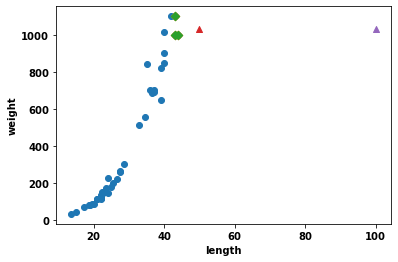

In [9]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
distances2, indexes2 = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(train_input[indexes2], train_target[indexes2], marker='D')

plt.scatter(50, 1033, marker='^')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 농어의 길이가 아무리 늘어나도 최근접 이웃의 데이터가 한계가 있기 때문에 무게가 늘어나지 않습니다.

# 선형 회귀(Linear Regression)

In [10]:
# sklearn에서 LinearRegression 클래스로 선형 회귀 모델 알고리즘 사용
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 예측
lr.predict([[50]])

array([1241.83860323])

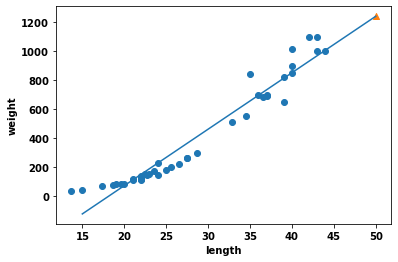

In [11]:
plt.scatter(train_input, train_target)

# 15에서 50까지 선형 회귀가 학습한 1차 방정식을 그린다
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 선형회귀가 학습한 직선을 그려보았습니다.
#### 농어무게 = a * 농어 길이 + b
#### 이 데이터에 가장 잘 맞는 a와 b는 coef_와 intercept_ 속성에 저장되어 있습니다.

In [12]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.018644953547


In [13]:
# R²확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313562


#### 전체적으로 과소적합된 score가 나타나고 있습니다.

# 다항 회귀(Polynomial Regression)

In [14]:
# 길이를 제곱한 항을 훈련 세트에 추가한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [16]:
# train_poly를 사용해 선형 회귀 모델 다시 훈련
# 무게 = a * 길이²+ b * 길이 + c
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 예측 할 때도 제곱과 길이를 같이 넣어줌
lr.predict([[50**2, 50]])

array([1573.98423528])

In [17]:
# 각각 a, b, c
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


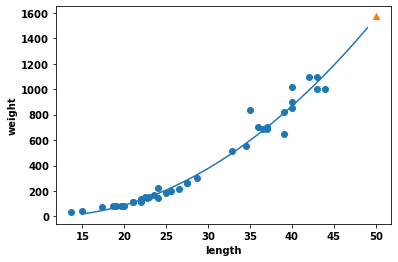

In [18]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 앞에 나온 계수와 절편을 통해 2차 방정식을 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 앞의 단순 선형 회귀 모델보다 나은 그래프가 그려졌습니다.

In [19]:
# R²확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


#### 훈련 세트와 테스트 세트에 점수가 높아졌지만 과소적합을 보이고 있다.